In [684]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import random
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

## Ejercicio 1

 Dada una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas l0,l1,l2 y linfinito.

In [7]:
a=np.array([1,2,0]) #invento un vector a
b=np.array([3,-5,0]) # invento un vevctor b
c=np.array([a,b])    #es la matriz compuesta por a y b

l0 = sum(1 for x in a if x!=0)
l1= sum(abs(x) for x in b)
l2 = np.sqrt(sum(abs(x)**2 for x in b))
l_inf = np.max(np.abs(b))


## Ejercicio 2

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)

Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [8]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])


In [9]:
def true_positives(truth,prediction):
    return np.sum((truth == 1) & (prediction == 1))

tp = true_positives(truth,prediction)
print('True positives',tp)


True positives 3


In [10]:
def false_positives(truth,prediction):
    return np.sum((truth == 0) & (prediction == 1))

fp = false_positives(truth,prediction)
print('False positives',fp)

False positives 3


In [11]:
def true_negatives(truth,prediction):
    return np.sum((truth == 0) & (prediction == 0))

tn = true_negatives(truth,prediction)
print('True negatives',tn)

True negatives 1


In [12]:
def false_negatives(truth,prediction):
    return np.sum((truth == 1) & (prediction == 0))

fn = false_negatives(truth,prediction)
print('False negatives',fn)

False negatives 3


In [13]:
precision = (tp/(tp+fp))

recall = tp/(tp+fn)

accuracy = (tp+tn)/(tp+tn+fp+fn)

print('La precisión es=',precision)
      
print('El recall es= ', recall)
      
print('Accuracy es= ',accuracy)


La precisión es= 0.5
El recall es=  0.5
Accuracy es=  0.4


## Ejercicio 3

Crear una función que separe los datos en train-validation-test. Debe recibir de parametros:

* X: Array o Dataframe que contiene los datos de entrada del sistema.
* y: Array o Dataframe que contiene la(s) variable(s) target del problema.
* train_percentage: float el porcentaje de training.
* test_percentage: float el porcentaje de testing.
* val_percentage: float el porcentaje de validación.
* shuffle: bool determina si el split debe hacerse de manera random o no.
    
Hints:

* Usar Indexing y slicing
* Usar np.random.[...]

In [20]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=2*x


In [742]:
 def split(x,
            y,
            train_size=float,
            val_size=float,
            test_size=float,
            random_state=int,
            shuffle=bool):
   

    muestra=len(x)
    train = int(train_size*muestra)
    test = int(test_size*muestra)
    val = int(test_size*muestra)


    if shuffle:
       
        indices = np.random.permutation(muestra)
            
        x=x[indices]
        y=y[indices]

    x_train = x[:train]
    y_train = y[:train]
    x_test = x[train:train + test]
    y_test = y[train:train + test]
    x_val = x[train + test:train + test + val]
    y_val = y[train + test:train + test + val]  
    
        
    return x_train, x_test, x_val, y_train, y_test, y_val

x_train, x_test,x_val, y_train, y_test, y_val=split(x,y,train_size=0.7,test_size=0.15,val_size=0.15,random_state=10,shuffle=True)
print('x_train',x_train)
print('x_test',x_test)
print('x_val',x_val)
print('y_train',y_train)
print('y_test',y_test)
print('y_val',y_val)


x_train [[65.  0.  3. ...  1.  1.  3.]
 [56.  0.  4. ...  2.  2.  7.]
 [74.  0.  2. ...  1.  1.  3.]
 ...
 [52.  0.  3. ...  2.  0.  3.]
 [60.  0.  1. ...  1.  0.  3.]
 [66.  1.  2. ...  2.  3.  6.]]
x_test [[4.60000000e+01 0.00000000e+00 2.00000000e+00 1.05000000e+02
  2.04000000e+02 0.00000000e+00 0.00000000e+00 1.72000000e+02
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  3.00000000e+00]
 [5.10000000e+01 1.00000000e+00 4.00000000e+00 1.40000000e+02
  2.99000000e+02 0.00000000e+00 0.00000000e+00 1.73000000e+02
  1.00000000e+00 1.60000000e+00 1.00000000e+00 0.00000000e+00
  7.00000000e+00]
 [4.20000000e+01 1.00000000e+00 3.00000000e+00 1.20000000e+02
  2.40000000e+02 1.00000000e+00 0.00000000e+00 1.94000000e+02
  0.00000000e+00 8.00000000e-01 3.00000000e+00 0.00000000e+00
  7.00000000e+00]
 [4.10000000e+01 1.00000000e+00 4.00000000e+00 1.10000000e+02
  1.72000000e+02 0.00000000e+00 2.00000000e+00 1.58000000e+02
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000

## Ejercicio 4

Utilizando la funcion generate_data generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:

 data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')
                    
Analice como varía el problema cuando se generan múltiples veces el dataset con un valor de noise fijo.


In [22]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
valores_random_state=np.arange(1,101,1)

resultados_coeficientes=[]
semillas=[]
coef_r2=[]
resultados_mse=[]

#Genero con un bucle for 100 veces el dataset para valores de random state de 1 a 100 y un valor fijo de ruido.

for random_state in valores_random_state:

    data = generate_dataset(n_samples=1000,
                    n_features=10, # N=5
                    n_informative=5,# M=5
                    n_targets=1,
                    noise=20.0,
                    random_state=random_state,
                    output='dataframe')

    x_datos = data.iloc[:,:10]
    y_datos = data.target


    x_train, x_test, y_train, y_test = train_test_split(x_datos,y_datos, test_size=0.2, random_state=10)


    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coeficientes = lr.coef_
    intercepto = lr.intercept_
    
    semillas.append(random_state)
    resultados_coeficientes.append(coeficientes)
    coef_r2.append(r2)
    resultados_mse.append(mse)
 
df=pd.DataFrame(resultados_coeficientes)
df.insert(0,'semillas',semillas)
df.insert(11,'r2',coef_r2)
df.insert(12,'mse',resultados_mse)
df


,semillas,0,1,2,3,4,5,6,7,8,9,r2,mse
0,1,-0.808115,26.398138,2.764175,-0.586796,0.836594,86.093242,0.605243,-0.372675,92.048794,11.884598,0.980379,378.092281
1,2,-1.179891,0.720851,16.524083,27.426861,12.381320,55.859459,-0.315095,-0.484492,0.627890,20.413229,0.906327,452.122708
2,3,-0.419807,39.438342,-0.845399,0.409087,-1.190868,-0.161173,48.408802,46.061737,39.434328,27.827212,0.950087,366.157974
3,4,0.096584,-1.437577,50.004097,55.715997,60.421381,31.313988,0.142500,2.934121,-0.461380,-0.005344,0.957526,412.870084
4,5,33.568779,36.884395,0.467864,50.205602,0.524913,-1.106646,-1.138925,-0.779088,33.507558,90.119433,0.973942,424.779539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.413769,-1.169809,-0.341246,30.080962,33.390681,12.271365,50.812025,0.313919,0.855045,26.808494,0.929148,392.111823
96,97,0.943160,0.896339,0.031147,87.345325,-0.239225,-1.302127,80.496432,59.614453,43.964241,42.673560,0.982121,417.084683
97,98,8.646901,74.338772,95.115283,1.150249,-1.208397,0.741053,-0.252018,-0.026638,94.941107,46.100018,0.984061,415.713229
98,99,-1.228327,3.678960,21.582634,-0.067965,48.400978,-0.976317,27.593727,0.358165,95.015193,0.505532,0.970678,427.885410


## Preguntas y respuestas

* Qué pasa con los coeficientes de las variables no informativas? 

*Se observa que los coeficientes de las variables no informativas son muy cercanos a cero.*

* La regresión se ve afectada por estas variables? 

*Si, introducen ruido.*

* Simule el mismo dataset 100 veces y analice los coeficientes, que se puede notar?

*Que los coeficientes van cambiando pero siempre se cumple que la cantidad de coeficientes muy cercanos a cero coinciden con la cantidad de variables no informativas del modelo.*

## Ejercicio 5

Utilizando la funcion generate_outliers generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado extreme_outliers como False y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1) Generar datasets:
* Uno normal con poco noise y pocos outliers
* Uno con mucho noise y pocos outliers
* Uno con poco noise y muchos outliers
* Uno con mucho noise y muchos outliers

2) Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.

3) Comparar y analizar resultados.

In [749]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

#Genero con un bucle for 4 veces para generar los 4 dataset pedidos

valores_noise=np.array([2,20,2,20])
valores_outliers=np.array([0.02,0.02,0.2,0.2])

resultados_coeficientes_5=[]
coef_r2_5=[]
resultados_mse_5=[]
ruido_5=[]
outliers_5=[]
coef_r2_5_hr=[]
resultados_mse_5_hr=[]
coef_r2_5_el=[]
resultados_mse_5_el=[]

for noise_5,percentage in zip(valores_noise,valores_outliers):
    

        data_1 = generate_dataset(n_samples=1000,
                    n_features=10, # N=5
                    n_informative=7,# M=5
                    n_targets=1,
                    noise=noise_5,
                    random_state=40,
                    output='dataframe')

        data_2 = generate_outliers(
                 df=data_1,
                 cols = data_1.iloc[:,[2,6,9]],
                 extreme_outlier = False,
                 two_tailed= True,
                 percentage= percentage)


        x_datos_5 = data_2.iloc[:,:10] 
        y_datos_5 = data_2.target


        x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_datos_5,y_datos_5, test_size=0.2, random_state=10)

        #Aplico lineal regressor de SKlearn
        lr=LinearRegression()
        lr.fit(x_train_5, y_train_5)
        y_pred_5 = lr.predict(x_test_5)
        
        mse_5 = mean_squared_error(y_test_5, y_pred_5)
        r2_5 = r2_score(y_test_5, y_pred_5)
        coeficientes_5 = lr.coef_
        intercepto_5 = lr.intercept_
    
        #Aplico Huber regressor de SKlearn
        hr=HuberRegressor()
        hr.fit(x_train_5, y_train_5)
        y_pred_5_hr = hr.predict(x_test_5)
        
        mse_5_hr = mean_squared_error(y_test_5, y_pred_5_hr)
        r2_5_hr = r2_score(y_test_5, y_pred_5_hr)
        coef_r2_5_hr.append(r2_5_hr)
        resultados_mse_5_hr.append(mse_5_hr)
      
         #Aplico ElasticNetCV de SKlearn
        el=ElasticNetCV()
        el.fit(x_train_5, y_train_5)
        y_pred_5_el = el.predict(x_test_5)
        
        mse_5_el = mean_squared_error(y_test_5, y_pred_5_el)
        r2_5_el = r2_score(y_test_5, y_pred_5_el)
        coef_r2_5_el.append(r2_5_el)
        resultados_mse_5_el.append(mse_5_el)
        
    
    
        resultados_coeficientes_5.append(coeficientes_5)
        coef_r2_5.append(r2_5)
        resultados_mse_5.append(mse_5)
        
        
        ruido_5.append(noise_5)
        outliers_5.append(percentage)
        
        
       

df1=pd.DataFrame(ruido_5)
df1.insert(0,'noise',ruido_5)
df1.insert(1,'% outliers',outliers_5)
df1.insert(2,'r2 LR',coef_r2_5)
df1.insert(3,'r2 HR',coef_r2_5_hr)
df1.insert(4,'r2 EL',coef_r2_5_el)
df1.insert(5,'mse LR',resultados_mse_5)
df1.insert(6,'mse HR',resultados_mse_5_hr)
df1.insert(7,'mse EL',resultados_mse_5_el)
df1

,noise,% outliers,r2 LR,r2 HR,r2 EL,mse LR,mse HR,mse EL,0
0,2,0.02,0.883310,0.878658,0.883827,2363.502365,2457.714972,2353.035794,2
1,20,0.02,0.960095,0.965021,0.949377,818.630182,717.572912,1038.500409,20
2,2,0.20,0.850366,0.842530,0.843744,3030.766835,3189.485900,3164.895047,2
3,20,0.20,0.745312,0.720089,0.742916,5224.746065,5742.195225,5273.906614,20


### Conclusiones

* Se verifica que en casos de mucho ruido y muchos outliers el mejor ajuste evaluado por el r2 el Linear Regressor.
* En casos de poco ruido y pocos outliers ElasticNet tiene el mejor ajuste.
* En casos donde el ruido es elevado es mejor usar Hubber Regressor.
* En caso de haber alto porcentaje de outliers usar Linear Regressor.



## Ejercicio 6

Para este ejercicio vamos a considerar los siguientes datasets:

* HAR (Ejercicio 3)
* MNIST (Ejercicio 4)

1) Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

2) Gráficar la variación acumulada para cada caso.

3) Utilizando KMeans agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=6 (ej 6) y 
 k=10 (ej 7). Luego en ambos casos probar con k=2.

4) Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

5) Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [755]:
# Cargo los datasets
X_train = np.loadtxt('X_train.txt')
y_train = np.loadtxt('y_train.txt').reshape(7352,1)
X_test = np.loadtxt('X_test.txt')
y_test = np.loadtxt('y_test.txt').reshape(2947,1)

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#1 Se aplica PCA y previamente se valida que se cumpla la condición de que los datos esten escalados

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)


pca_80 = PCA(n_components=0.8).fit(X_train_scaled)
X_pca_80=pca_80.transform(X_train_scaled)
print("La cantidad de features necesarias para explicar el 80% de la varianza es :", X_pca_80.shape[1])


La cantidad de features necesarias para explicar el 80% de la varianza es : 26


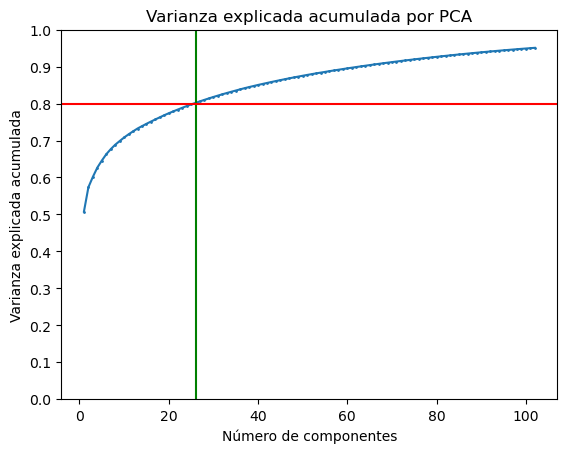

In [98]:
#2 Grafico la variación acumulada al sumar los features

pca = PCA(n_components=0.95,svd_solver='auto')
X_pca=pca.fit_transform(X_train_scaled)
varianza_exp=pca.explained_variance_ratio_
varianza_acum=np.cumsum(varianza_exp)


plt.plot(range(1, len(varianza_acum) + 1), varianza_acum, marker='o', markersize=1)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='g')
plt.axhline(0.8, c='r')
plt.show()


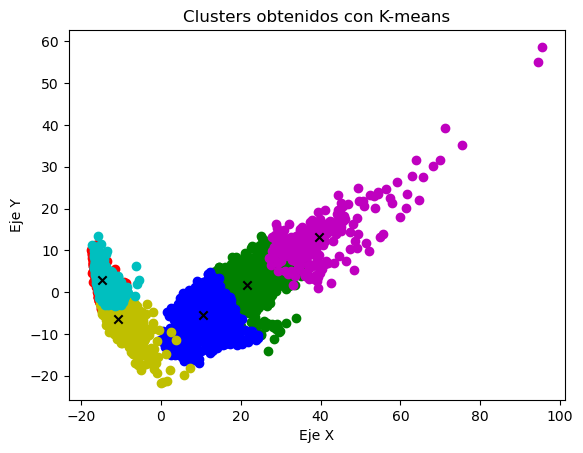

In [136]:
#3 Utilizar KMeans sobre el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=6 (ej 6) y k=10 (ej 7).
#Primero pruebo con k=2

k1 = 6

kmeans_6 = KMeans(n_clusters=k1)
kmeans_6.fit(X_pca_80)

labels_6 = kmeans_6.labels_
centroides_6 = kmeans_6.cluster_centers_

colores = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k1):
    puntos = X_pca_80[labels_6 == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_6[i, 0], centroides_6[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

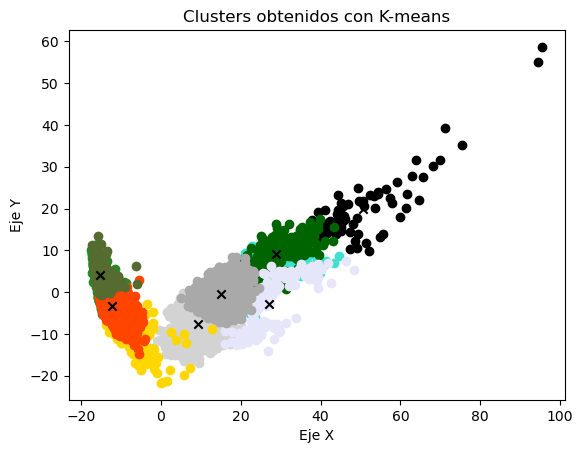

In [121]:
#Pruebo con k=10

k2 = 10

kmeans_10 = KMeans(n_clusters=k2)
kmeans_10.fit(X_pca_80)

labels_10 = kmeans_10.labels_
centroides_10 = kmeans_10.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 10
colores = random.sample(lista_colores, num_colores)

for i in range(k2):
    puntos = X_pca_80[labels_10 == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_10[i, 0], centroides_10[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.title('Clusters obtenidos con K-means')
plt.show()

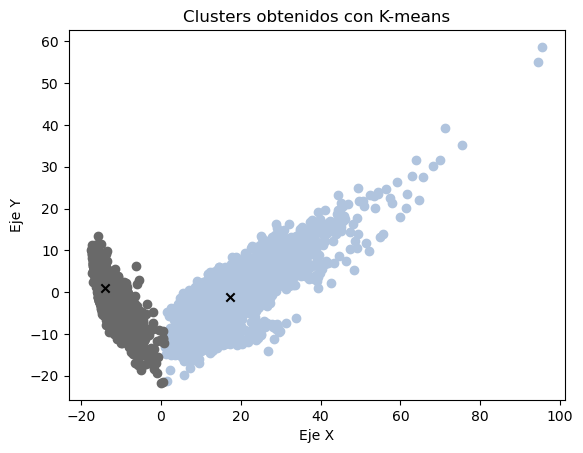

In [123]:
# Pruebo con k=2 para el data set transformado

k3 = 2

kmeans_2 = KMeans(n_clusters=k3)
kmeans_2.fit(X_pca_80)

labels_2 = kmeans_2.labels_
centroides_2 = kmeans_2.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 2
colores = random.sample(lista_colores, num_colores)

for i in range(k3):
    puntos = X_pca_80[labels_2 == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_2[i, 0], centroides_2[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

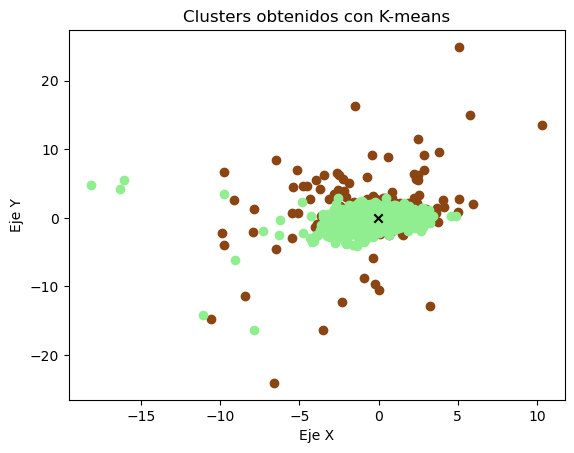

In [750]:
# Pruebo con k=2 para el dataset original

k3 = 2

kmeans_2_orig = KMeans(n_clusters=k3)
kmeans_2_orig.fit(X_train_scaled)

labels_2_orig = kmeans_2_orig.labels_
centroides_2_orig = kmeans_2_orig.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 2
colores = random.sample(lista_colores, num_colores)

for i in range(k3):
    puntos = X_train_scaled[labels_2_orig == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_2_orig[i, 0], centroides_2_orig[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

## Conclusiones:

* 1) Sin aplicar PCA para poder proyectar los datos sobre las dos primeras componentes pricipales es imposible evidenciar la clusterización.
* 2) Al aplicar k means con K>2 se evidencia que la clusterización no es buena.
* 3) Se puede concluir que la clusterización es buena con k=2 dado que los posibles estados de la variable objetivo son función
de dos estados principales : "caminar" y "estar parado".


## Ejercicio 7

### Aplicar los pasos del punto 6 al dataset MNIST

In [308]:
import sklearn 
data=sklearn.datasets.load_digits()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()
# Separo el dataset 
x=np.array(data['data'])
y=np.array(df['target']).reshape(-1,1)

# Verifico las etiquetas
u=np.unique(y)
u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [209]:
# Divido el dataset en train-test
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(x,y,test_size=0.3, random_state=42,shuffle='true')


In [211]:
#1 Se aplica PCA y previamente se valida que se cumpla la condición de que los datos esten escalados

scaler_mnist=StandardScaler()
x_train_scaled_mnist = scaler.fit_transform(x_train_mnist)
y_train_scaled_mnist = scaler.fit_transform(y_train_mnist)

x_test_scaled_mnist = scaler.fit_transform(x_test_mnist)
y_test_scaled_mnist = scaler.fit_transform(y_test_mnist)


pca_80_mnist = PCA(n_components=0.8).fit(x_train_scaled_mnist)
x_pca_80_mnist=pca_80_mnist.transform(x_train_scaled_mnist)
print("La cantidad de features necesarias para explicar el 80% de la varianza es :", x_pca_80_mnist.shape[1])


La cantidad de features necesarias para explicar el 80% de la varianza es : 21


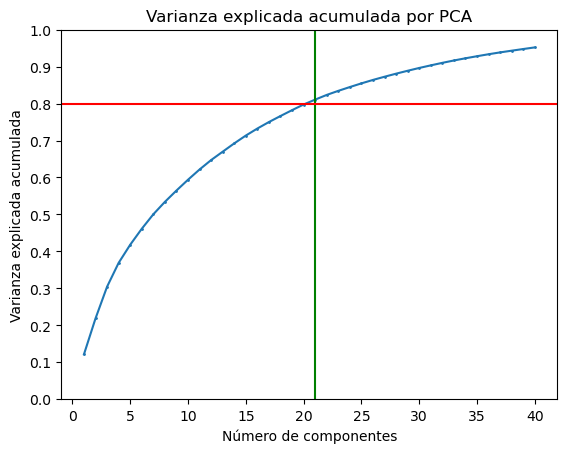

In [235]:
#2 Grafico la variación acumulada al sumar los features

pca_mnist = PCA(n_components=0.95,svd_solver='auto')
x_pca_mnist=pca_mnist.fit_transform(x_train_scaled_mnist)
varianza_exp_mnist=pca_mnist.explained_variance_ratio_
varianza_acum_mnist=np.cumsum(varianza_exp_mnist)


plt.plot(range(1, len(varianza_acum_mnist) + 1), varianza_acum_mnist, marker='o', markersize=1)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='g')
plt.axhline(0.8, c='r')
plt.show()


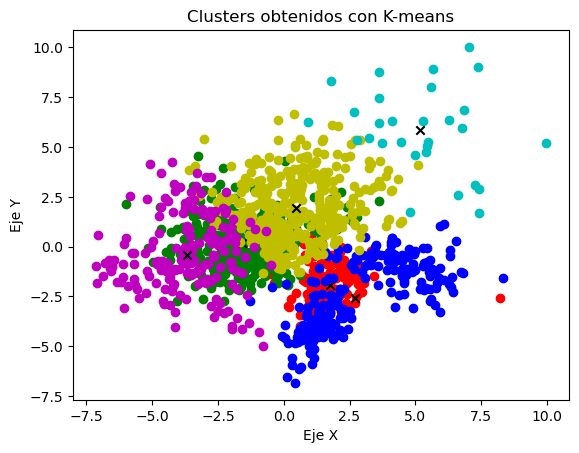

In [219]:
#3 Utilizar KMeans sobre el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=6 (ej 6) y k=10 (ej 7).
#Primero pruebo con k=2

k1 = 6

kmeans_6_mnist = KMeans(n_clusters=k1)
kmeans_6_mnist.fit(x_pca_80_mnist)

labels_6_mnist = kmeans_6_mnist.labels_
centroides_6_mnist = kmeans_6_mnist.cluster_centers_

colores = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k1):
    puntos = x_pca_80_mnist[labels_6_mnist == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_6_mnist[i, 0], centroides_6_mnist[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

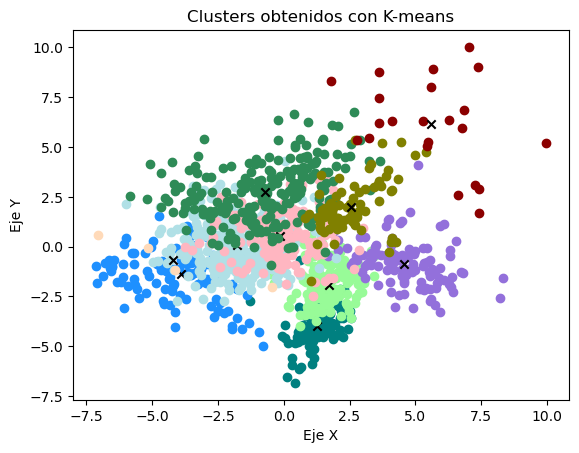

(10, 21)

In [223]:
#Pruebo con k=10

k2 = 10

kmeans_10_mnist = KMeans(n_clusters=k2)
kmeans_10_mnist.fit(x_pca_80_mnist)

labels_10_mnist = kmeans_10_mnist.labels_
centroides_10_mnist = kmeans_10_mnist.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 10
colores = random.sample(lista_colores, num_colores)

for i in range(k2):
    puntos = x_pca_80_mnist[labels_10_mnist == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_10_mnist[i, 0], centroides_10_mnist[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.title('Clusters obtenidos con K-means')
plt.show()


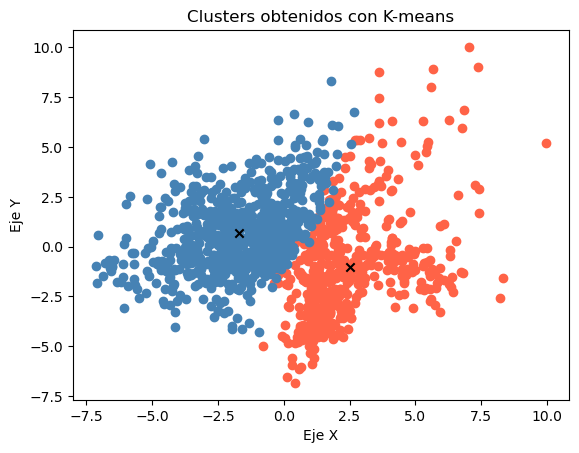

In [225]:
# Pruebo con k=2 para el data set transformado

k3 = 2

kmeans_2_mnist = KMeans(n_clusters=k3)
kmeans_2_mnist.fit(x_pca_80_mnist)

labels_2_mnist = kmeans_2_mnist.labels_
centroides_2_mnist = kmeans_2_mnist.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 2
colores = random.sample(lista_colores, num_colores)

for i in range(k3):
    puntos = x_pca_80_mnist[labels_2_mnist == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_2_mnist[i, 0], centroides_2_mnist[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

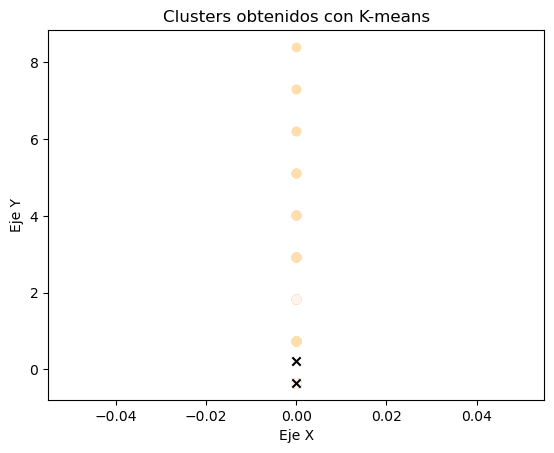

In [234]:
# Pruebo con k=2 para el dataset original

k3 = 2

kmeans_2_orig_mnist = KMeans(n_clusters=k3)
kmeans_2_orig_mnist.fit(x_train_scaled_mnist)

labels_2_orig_mnist = kmeans_2_orig_mnist.labels_
centroides_2_orig_mnist = kmeans_2_orig_mnist.cluster_centers_

lista_colores = list(mcolors.CSS4_COLORS.keys())

num_colores = 2
colores = random.sample(lista_colores, num_colores)

for i in range(k3):
    puntos = x_train_scaled_mnist[labels_2_orig_mnist == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i])
    plt.scatter(centroides_2_orig_mnist[i, 0], centroides_2_orig_mnist[i, 1], color='k', marker='x')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clusters obtenidos con K-means')
plt.show()

## Conclusiones 
* 1) Aplicando PCA se puede graficar las variables predictoras proyectandolas sobre las primeras dos componentes principales pero no se observa una buena clusterizacion como con el dataset de HAR.

## Ejercicio 8

 Trabajo con el dataset "Heart disease" el cual consta de 13 variables predictoras y una variable objetivo que va de 0 a 4 donde 0 = ausencia de enfermedad y 1,2,3 y 4 corresponden a diferentes niveles de enfermedad cardíaca.

In [572]:
my_cols = pd.read_csv('columns.csv').column.values.tolist()
df = pd.read_csv('processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

df = df.replace('?', np.nan)
df.loc[df['num'] > 0, 'num'] = 1 #cualquier valor mayor a cero implica enfermedad(es clasificación binaria)

#Verifico si faltan valores en el dataset
valores_faltantes_por_columna = df.isnull().sum()
total_valores_faltantes = valores_faltantes_por_columna.sum()
print('La cantidad de valores faltantes en el dataset es:',total_valores_faltantes)


La cantidad de valores faltantes en el dataset es: 6


<AxesSubplot:>

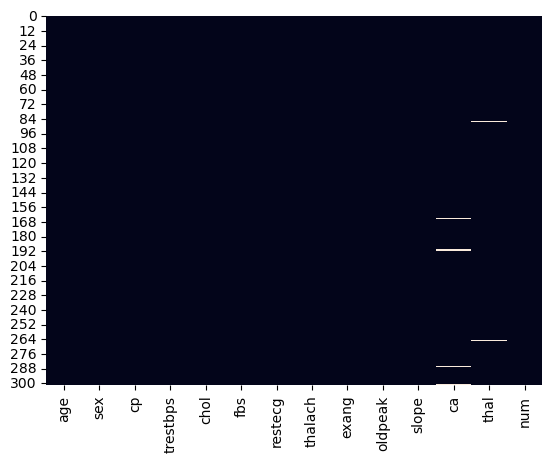

In [571]:
#Analizo con un mapa de calor los valores faltantes
sns.heatmap(df.isnull(), cbar=False)
#Se observan valores faltantes en las columnas 12 y 13

In [574]:
#Extraigo del dataset los valores de X que corresponden a variables predictoras e Y que es la variable objetivo
x0=np.array(df.values[:,:13])
y=np.array(df.values[:,13].reshape(-1,1))

# Transformar los datos completando los valores faltantes con la media
imputer=SimpleImputer(strategy='mean')
imputer.fit(x0)
x=imputer.transform(x0)



In [681]:
#Separo el dataset en variables predictoras x y target y datos de train y test

x_train_hd,x_test_hd,y_train_hd,y_test_hd=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=45)

y_train_hd = y_train_hd.astype(int)
y_test_hd = y_test_hd.astype(int)

#Escalo los datos originales
scaler_hd=StandardScaler()
x_train_scaled_hd = scaler_hd.fit_transform(x_train_hd)
x_test_scaled_hd = scaler_hd.fit_transform(x_test_hd)

In [658]:
#Aplico PCA para reducir la dimensionalidad del dataset
pca_80_hd = PCA(n_components=0.8).fit(x_train_scaled_hd)
x_pca_80_hd=pca_80_hd.transform(x_train_scaled_hd)
print("La cantidad de features necesarias para explicar el 80% de la varianza es :", x_pca_80_hd.shape[1])

La cantidad de features necesarias para explicar el 80% de la varianza es : 8


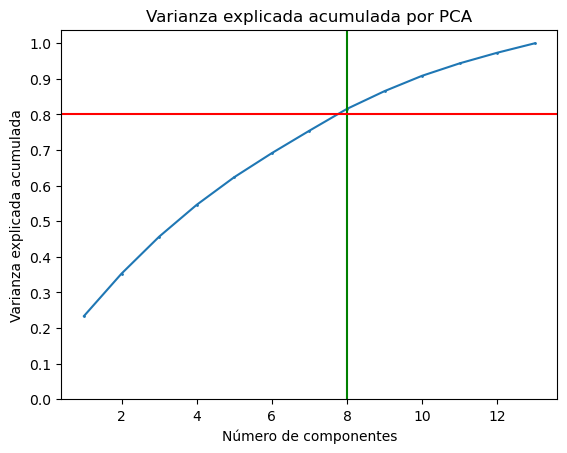

In [659]:
# Grafico la variación acumulada al sumar los features

pca_hd = PCA(n_components=0.999,svd_solver='auto')
x_pca_hd=pca_hd.fit_transform(x_train_scaled_hd)
varianza_exp_hd=pca_hd.explained_variance_ratio_
varianza_acum_hd=np.cumsum(varianza_exp_hd)


plt.plot(range(1, len(varianza_acum_hd) + 1), varianza_acum_hd, marker='o', markersize=1)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='g')
plt.axhline(0.8, c='r')
plt.show()


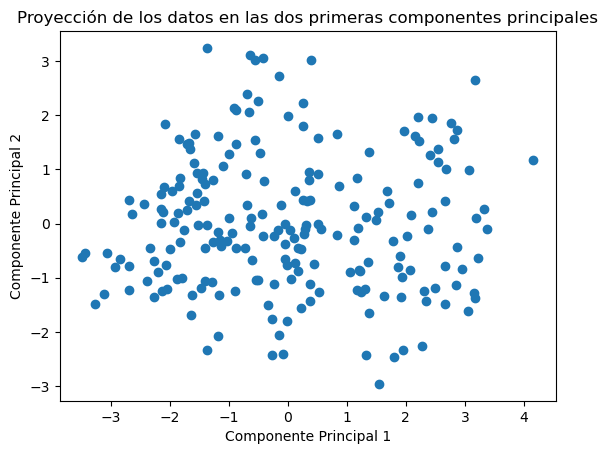

In [728]:
#Realizo un grafico proyectando los puntos sobre las dos primeras componentes principales

plt.scatter(x_pca_hd[:, 0], x_pca_hd[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de los datos en las dos primeras componentes principales')
plt.show()



*$Conclusión$: Se observa que no hay clusterización de los datos en el espacio de variables.

In [729]:
#Pruebo aplicar regresión logística

log_reg=LogisticRegressionCV(cv=20,max_iter=10000,solver='newton-cg')

y_train_hd = y_train_hd.astype(int)
y_test_hd = y_test_hd.astype(int)

#Modifico el vector y_train_hd para pasarlo como parámetro a la regresión logística
Y=y_train_hd.ravel() 

log_reg.fit(x_train_hd,Y)

# Obtengo los coeficientes del modelo entrenado
coeficients_log_reg = log_reg.coef_
intercept_log_reg = log_reg.intercept_


# Realizo predicciones
predictions_log_reg = log_reg.predict(x_test_hd).reshape(91,1)

# Imprimo los resultados
print("Coeficientes:", coeficients_log_reg)
print("Intercepto:", intercept_log_reg)



Coeficientes: [[-0.00927576  0.69651818  0.58948149  0.01878443  0.00985459 -0.13061298
   0.19299278 -0.02378129  0.66630038  0.36614285  0.18870353  0.85759558
   0.37949693]]
Intercepto: [-6.50638608]


In [721]:
# Obtengo las métricas adecuadas del modelo
reporte_log_reg = classification_report(y_test_hd, predictions_log_reg,output_dict=True)
reporte_log_reg_df=pd.DataFrame(reporte_log_reg)
print(reporte_log_reg_df)

                   0          1  accuracy  macro avg  weighted avg
precision   0.909091   0.744681  0.824176   0.826886      0.838629
recall      0.769231   0.897436  0.824176   0.833333      0.824176
f1-score    0.833333   0.813953  0.824176   0.823643      0.825028
support    52.000000  39.000000  0.824176  91.000000     91.000000


In [726]:
#Ahora pruebo con el SGDC Classifier
sgd_classifier = SGDClassifier(max_iter=1000)
sgd_classifier.fit(x_train_scaled_hd, y_train_hd.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred_sgd = sgd_classifier.predict(x_test_scaled_hd)

coeficientes_sgd=sgd_classifier.coef_
intercepto_sgd=sgd_classifier.intercept_
print('Los coeficientes son:',coeficientes_sgd)
print('El intercept es:',intercepto_sgd)

Los coeficientes son: [[ 0.43276554  5.77022105  4.02196775  8.17570999  0.71646778 -3.79761728
  -2.67267655 -3.24333211  5.69800017 -0.59088586  2.22012023  0.95650343
   0.65425038]]
El intercept es: [0.52391461]


In [715]:
# Obtengo las métricas adecuadas del modelo
reporte_sgd = classification_report(y_test_hd, y_pred_sgd,output_dict=True)

reporte_sgd_df=pd.DataFrame(reporte_sgd)

print(reporte_sgd_df)

                   0          1  accuracy  macro avg  weighted avg
precision   0.950000   0.725490  0.824176   0.837745      0.853782
recall      0.730769   0.948718  0.824176   0.839744      0.824176
f1-score    0.826087   0.822222  0.824176   0.824155      0.824431
support    52.000000  39.000000  0.824176  91.000000     91.000000


## * Conclusiones

1) Para el problema de clasificación binaria del dataset Heartdisease se aplican 2 modelos de clasificación:
- LogisticRegressorCV
- SGDC Classifier

2) En ambos modelos se obtiene valores de accuracy semejantes pero selecciono como mejor modelo de clasificación a la regresion logistica dado que se observa un recall mas alto en la clase negativa, es decir, el 0 que corresponde a "ausencia de enfermedad". En un caso de predicción de enfermedad quiero que la posibilidad de falsos negativos sea mínima. De esta forma me aseguro que no dejo fuera de un esquema de control sanitario a personas bajo riesgo sanitario real. Por eso, como el "recall" mide los aciertos lo evalúo en la clase negativa y observo que el recall mas alto lo ofrece la regresión logística.

- LogisticRegressorCV --> Recall (0)= 0.769231 (23,1 % de falsos negativos)
- SGDC Classifier     --> Recall(0)= 0.730769 (26,9 % de falsos negativos)